In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from IPython.display import display, HTML
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
import matplotlib.patches as patches
%matplotlib inline
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
augtz_df = pd.read_csv("orca_augtz.csv")
augtz_df.energy = augtz_df.energy - augtz_df.energy.mean()
columns = ["dist_CC", "dist_CO", "energy"]
augtz_df.columns = columns
display(augtz_df.head())
print(len(augtz_df))
print(augtz_df.energy.describe())

,dist_CC,dist_CO,energy
0,1.6,1.90,-12.019889
1,1.6,1.95,-9.286889
2,1.6,2.00,-6.660889
3,1.6,2.05,-4.149889
4,1.6,2.10,-1.842889


443
count    4.430000e+02
mean    -4.699526e-15
std      8.516834e+00
min     -1.734089e+01
25%     -6.738889e+00
50%      1.764111e+00
75%      7.293111e+00
max      1.706811e+01
Name: energy, dtype: float64


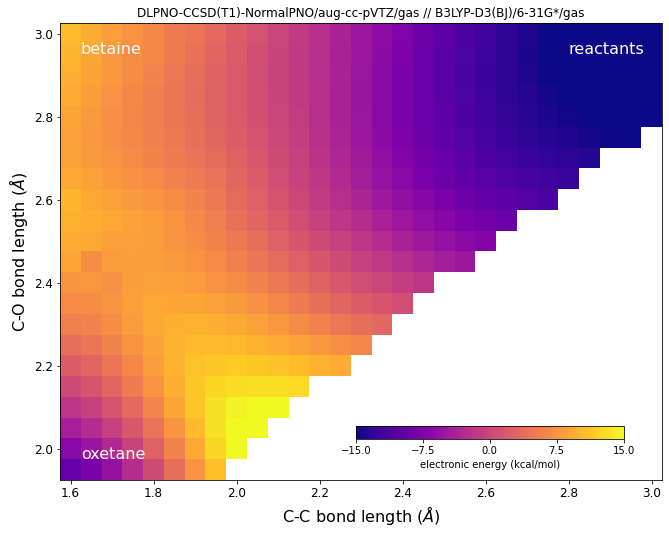

In [3]:
fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(111, aspect='equal')

norm = matplotlib.colors.Normalize(vmin=-15.0, vmax=15)
m = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

for index, row in augtz_df.iterrows():
    x,y,z = row.dist_CC, row.dist_CO, row.energy
    ax1.add_patch(
        patches.Rectangle(
            (x-0.025, y-0.025),        # (x,y)
            0.050,          # width
            0.050,          # height
            linewidth=0,
            color = m.to_rgba(z),
            zorder=1
        )
    )

m.set_array(augtz_df.energy)
ticks = np.linspace(-15,15,5)
cb = fig1.colorbar(m, shrink=0.40, use_gridspec=False, anchor=(0.82,2.8), orientation="horizontal",
     ticks=ticks, label="electronic energy (kcal/mol)")
cb.ax.tick_params(labelsize=10) 

ax1.set_title("DLPNO-CCSD(T1)-NormalPNO/aug-cc-pVTZ/gas // B3LYP-D3(BJ)/6-31G*/gas")
ax1.annotate("oxetane",(1.625,1.975),zorder=2,color='w',fontsize=16)
ax1.annotate("reactants",(2.80,2.95),zorder=2,color='w',fontsize=16)
ax1.annotate("betaine",(1.625,2.95),zorder=2,color='w',fontsize=16)

ax1.set_xlabel(r'C-C bond length ($\AA$)', fontsize=16)
ax1.set_ylabel(r'C-O bond length ($\AA$)', fontsize=16)
ax1.set_xlim(1.575,3.025)
ax1.set_ylim(1.925,3.025)
ax1.tick_params(labelsize=12)

plt.show()

In [4]:
dft_juldz_df = pd.read_csv("dft_juldz.csv")

,theory,basis,x,y,energy
1329,b3lyp_d3bj,juldz2,1.6,1.90,-9.21753
1330,b3lyp_d3bj,juldz2,1.6,1.95,-7.15053
1331,b3lyp_d3bj,juldz2,1.6,2.00,-5.10853
1332,b3lyp_d3bj,juldz2,1.6,2.05,-3.11253
1333,b3lyp_d3bj,juldz2,1.6,2.10,-1.19853


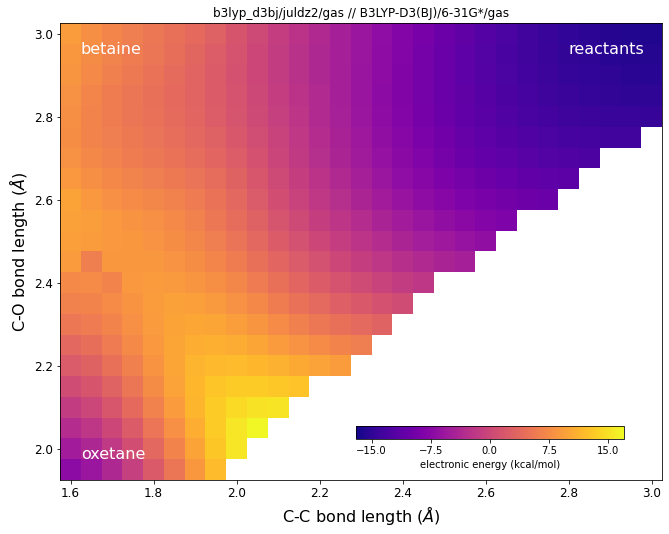

In [5]:
dft = "b3lyp_d3bj"
target_df = dft_juldz_df

query_df = target_df.query(f"theory == '{dft}'").copy()
query_df.energy = query_df.energy - query_df.energy.mean()
display(query_df.head())

fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(111, aspect='equal')

norm = matplotlib.colors.Normalize(vmin=-17.0, vmax=17.0)
m = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

for index, row in query_df.iterrows():
    x,y,z = row.x, row.y, row.energy
    ax1.add_patch(
        patches.Rectangle(
            (x-0.025, y-0.025),        # (x,y)
            0.050,          # width
            0.050,          # height
            linewidth=0,
            color = m.to_rgba(z),
            zorder=1
        )
    )

m.set_array(query_df.energy)
ticks = np.linspace(-15,15,5)
cb = fig1.colorbar(m, shrink=0.40, use_gridspec=False, anchor=(0.82,2.8), orientation="horizontal",
     ticks=ticks, label="electronic energy (kcal/mol)")
cb.ax.tick_params(labelsize=10) 

ax1.set_title(f"{dft}/{query_df.iloc[0].basis}/gas // B3LYP-D3(BJ)/6-31G*/gas")
ax1.annotate("oxetane",(1.625,1.975),zorder=2,color='w',fontsize=16)
ax1.annotate("reactants",(2.80,2.95),zorder=2,color='w',fontsize=16)
ax1.annotate("betaine",(1.625,2.95),zorder=2,color='w',fontsize=16)

ax1.set_xlabel(r'C-C bond length ($\AA$)', fontsize=16)
ax1.set_ylabel(r'C-O bond length ($\AA$)', fontsize=16)
ax1.set_xlim(1.575,3.025)
ax1.set_ylim(1.925,3.025)
ax1.tick_params(labelsize=12)

plt.show()

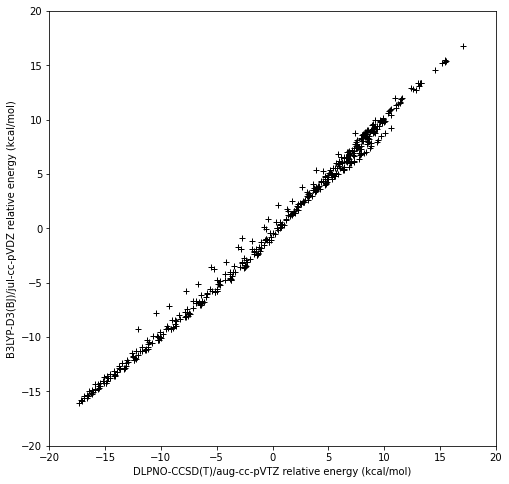

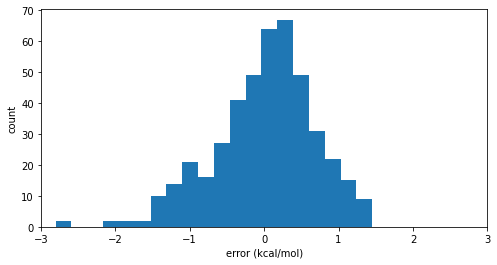

443
mean squared error: 0.68
Pearson r:          0.99721


In [6]:
reference_df = augtz_df.copy()
reference_df["id"] = reference_df[["dist_CC","dist_CO"]].apply(lambda x: f"{x[0]:.2f}-{x[1]:.2f}",axis=1)
reference_df.set_index("id",drop=True,inplace=True)
reference_df = reference_df.energy - reference_df.energy.mean()
reference_df.name="ref"
#display(reference_df.head())

dft="b3lyp_d3bj"
estimate_df = dft_juldz_df.query(f"theory == '{dft}'").copy()
#estimate_df = tz_df.copy()
estimate_df["id"] = estimate_df[["x","y"]].apply(lambda x: f"{x[0]:.2f}-{x[1]:.2f}",axis=1)
#estimate_df["id"] = estimate_df[["dist_CC","dist_CO"]].apply(lambda x: f"{x[0]:.2f}-{x[1]:.2f}",axis=1)

estimate_df.set_index("id",drop=True,inplace=True)
estimate_df = estimate_df.energy - estimate_df.energy.mean()
estimate_df.name="est"
#display(estimate_df.head())

regression_df = pd.concat([reference_df,estimate_df], join='inner', sort='false', axis=1)
#display(regression_df.head())
MSE = ((regression_df.ref - regression_df.est) ** 2).mean() ** 0.5
corr = regression_df.ref.corr(regression_df.est)
plt.figure(figsize=(8,8))
plt.plot(regression_df.ref, regression_df.est, "k+")
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel("DLPNO-CCSD(T)/aug-cc-pVTZ relative energy (kcal/mol)")
plt.ylabel("B3LYP-D3(BJ)/jul-cc-pVDZ relative energy (kcal/mol)")
plt.show()

energy_diffs = regression_df.ref - regression_df.est
plt.figure(figsize=(8,4))
plt.hist(energy_diffs, bins=20)
plt.xlim(-3,3)
plt.ylabel("count")
plt.xlabel("error (kcal/mol)")
plt.show()

print(len(regression_df))
print(f"mean squared error: {MSE:.2f}")
print(f"Pearson r:          {corr:.5f}")